In [1]:
%reload_ext autoreload
%autoreload 2

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
from astropy.io import ascii
from astropy.table import Table, vstack
import pandas as pd
import importlib.util
spec = importlib.util.find_spec("pyGRBz")
if spec and spec.origin:
    pathgrbz = os.path.dirname(spec.origin)
    path = os.getcwd()
else:
    print("Warning: Could not find module 'pyGRBz'. Using current working directory.")

# Fit only one SED

In [18]:
from pyGRBz.pyGRBz import GRB_photoZ

In [19]:
# Load module
photoz = GRB_photoZ(
    output_dir='/results/sed/',
    #output_dir='/home/nrakotondrainibe/Bureau/grb_git/codes____/photoz_module/SED',
    thres_err=0.02, # if flux_err/flux < thres_err then set flux_err = thres_err*flux
    wvl_step=50, # angstroms
    wvl_step_X=10 # angstroms
)

In [20]:
# Load the GRB SED stored in data/sed/
photoz.load_data(data_dir='/data/sed/',data_name=['GRB050904'])


Observations:
    Name   time_since_burst band  flux flux_err  zp flux_unit detection telescope
--------- ---------------- ---- ----- -------- --- --------- --------- ---------
GRB050904            1.155   Ks 19.26     0.07   -        AB         1     isaac
GRB050904            1.155    H 19.74     0.07   -        AB         1     isaac
GRB050904            1.155    J 20.14     0.06   -        AB         1     isaac
GRB050904            1.155    z 21.03     0.22   -        AB         1     fors2
GRB050904            1.155    I 22.27     0.22   -        AB         1     cafos
GRB050904            1.155    I  24.2      0.2   -        AB         1     fors2
GRB050904            1.155    R 24.29     0.05   -        AB         0     cafos
GRB050904            1.155    V 24.23     0.05   -        AB         0     laica


Info about data:
    name   type  RA_J2000   DEC_J2000   ... beta_inf beta_X beta_X_sup beta_X_inf
--------- ---- ---------- ------------ ... -------- ------ ---------- ---

In [21]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


SEDS formatted:
    Name   time_since_burst band ...     flux_corr         flux_corr_err   
                                ...      microJy             microJy      
--------- ---------------- ---- ... ------------------ -------------------
GRB050904            1.155    V ... 0.7379042301291044 0.18434138332737574
GRB050904            1.155    R ... 0.6982324040771732  0.1793175688589099
GRB050904            1.155    I ... 0.7585775750291881 0.37381165483615203
GRB050904            1.155    I ...  4.487453899331295  0.9535625369951598
GRB050904            1.155    z ...  14.06047524129924  1.6879095890510307
GRB050904            1.155    J ...  31.91537855100745  1.3280470614144213
GRB050904            1.155    H ...  46.13175745603771   1.724593957107847
GRB050904            1.155   Ks ...  71.77942912713644   2.151230070859339



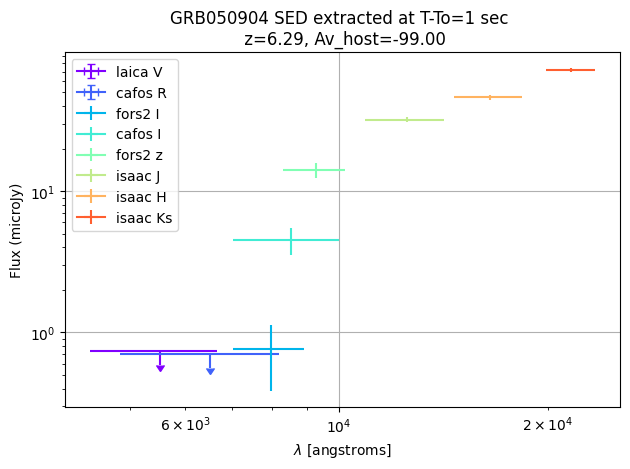


SEDS:
    Name   time_since_burst band  flux flux_err flux_unit
--------- ---------------- ---- ----- -------- ---------
GRB050904            1.155    V 24.23     0.05        AB
GRB050904            1.155    R 24.29     0.05        AB
GRB050904            1.155    I  24.2      0.2        AB
GRB050904            1.155    I 22.27     0.22        AB
GRB050904            1.155    z 21.03     0.22        AB
GRB050904            1.155    J 20.14     0.06        AB
GRB050904            1.155    H 19.74     0.07        AB
GRB050904            1.155   Ks 19.26     0.07        AB



In [22]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

photoz.extract_sed(model='SPL',method='ReddestBand')
#photoz.extract_sed(model='BPL',method='fixed',time_SED=70)

In [23]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,10],beta=[0,3],norm=[0.5,20])#,NHx=[0,10])



Fit 1/1 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7967 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.75.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
  0%|                                                                   | 0/1000 [00:00<?, ?it/s]/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBaglow/igm.py:77: RuntimeWarning: invalid value encountered in power
  tau_


Autocorrelation time: 94.56 steps


Mean acceptance fraction: 0.047

Best fit:
z: 6.488  Av: 0.075  beta: 1.309  Norm: 1.254     chi2: 5.994

Mean Proba: 5.58e-03
Sum Proba: 2.51e+02

68% - 1 sigma:
z: 6.282 +0.223 -5.621
Av: 0.405 +3.801 -0.222
Beta: 0.497 +0.574 -0.378
norm: 3.499 +2.039 -1.697

95% - 2 sigma:
z: 6.282 +0.778 -6.192
Av: 0.405 +6.669 -0.354
Beta: 0.497 +0.995 -0.473
norm: 3.499 +8.539 -2.373

99% - 3 sigma:
z: 6.282 +1.894 -6.273
Av: 0.405 +9.115 -0.387
Beta: 0.497 +2.279 -0.492
norm: 3.499 +16.354 -2.819


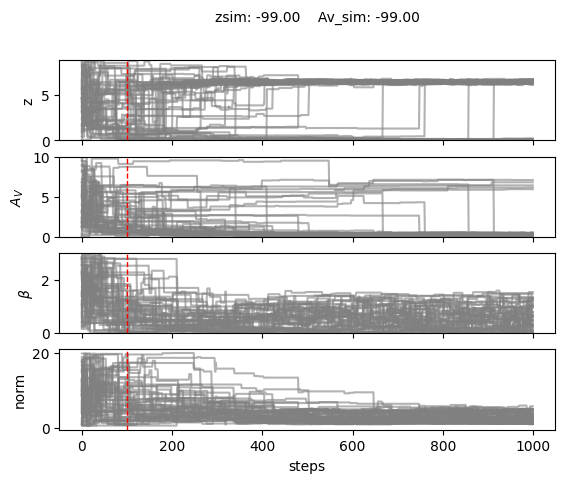

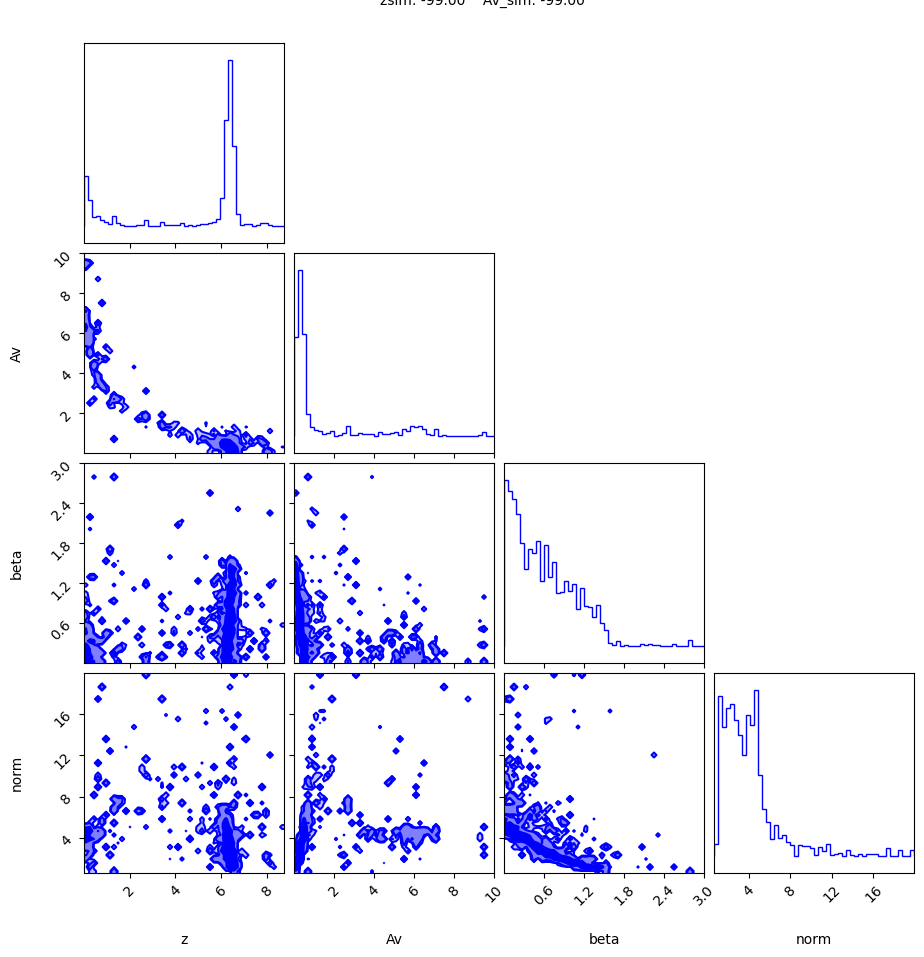


For best SED plot:
- Median values PDF: 6.282 0.405 0.497 3.499
- Best fit: 6.488 0.075 1.309 1.254


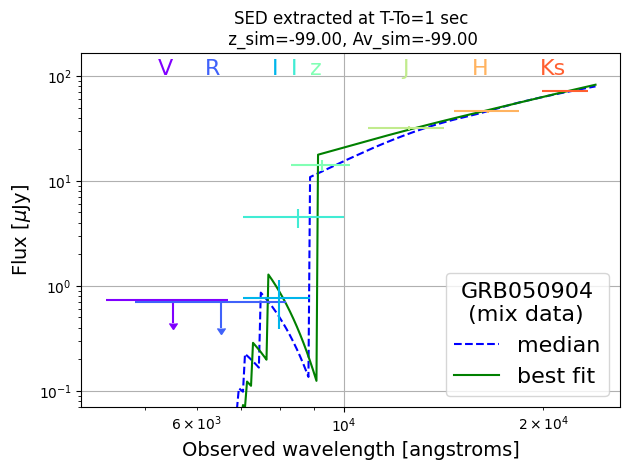


List of GRB not detected: []

None


Fit 1/1 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7967 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.75.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
  0%|                                                  


Autocorrelation time: 85.07 steps


Mean acceptance fraction: 0.066

Best fit:
z: 6.523  Av: 0.148  beta: 1.189  Norm: 1.535     chi2: 4.568

Mean Proba: 1.45e-02
Sum Proba: 6.52e+02

68% - 1 sigma:
z: 6.442 +0.154 -0.523
Av: 0.400 +0.637 -0.203
Beta: 0.765 +0.394 -0.588
norm: 3.009 +4.726 -1.269

95% - 2 sigma:
z: 6.442 +1.412 -6.345
Av: 0.400 +6.081 -0.337
Beta: 0.765 +0.730 -0.744
norm: 3.009 +12.684 -1.811

99% - 3 sigma:
z: 6.442 +2.103 -6.440
Av: 0.400 +9.484 -0.392
Beta: 0.765 +1.903 -0.763
norm: 3.009 +15.218 -2.024


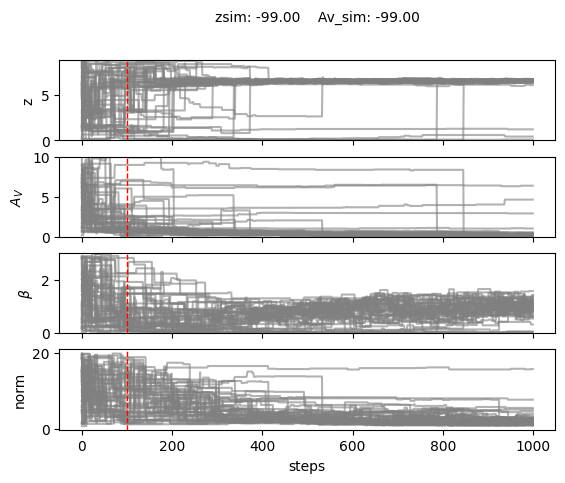

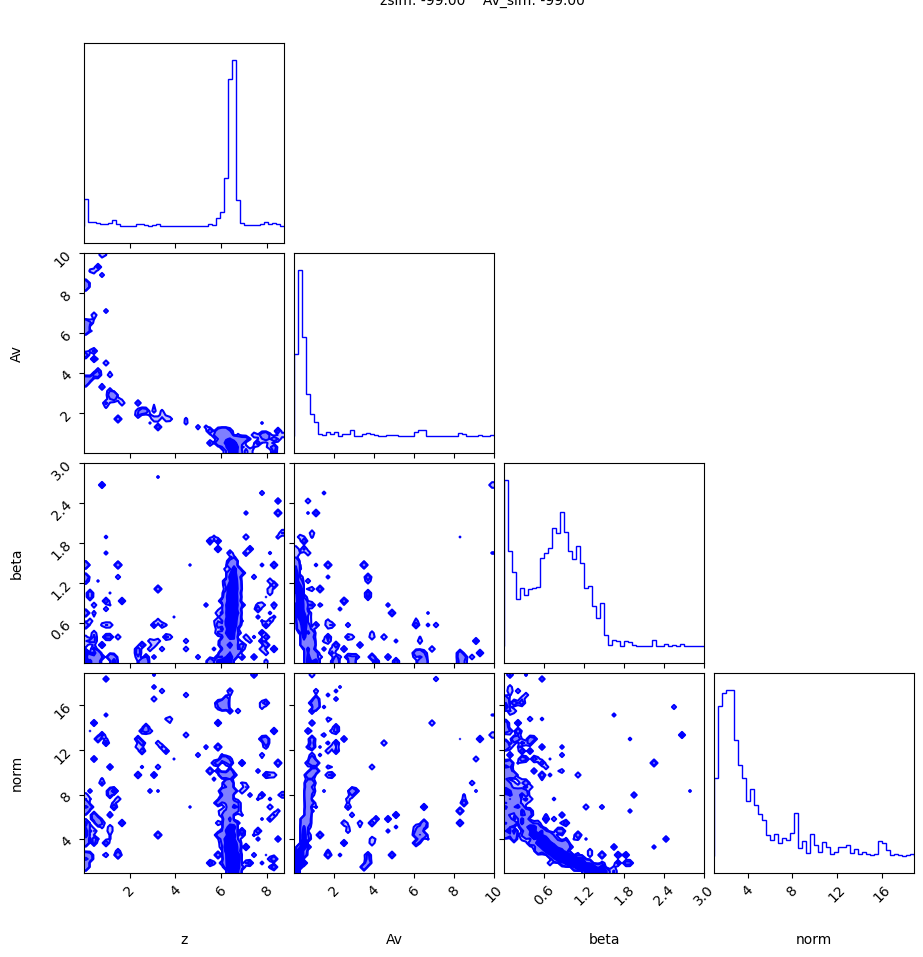


For best SED plot:
- Median values PDF: 6.442 0.400 0.765 3.009
- Best fit: 6.523 0.148 1.189 1.535


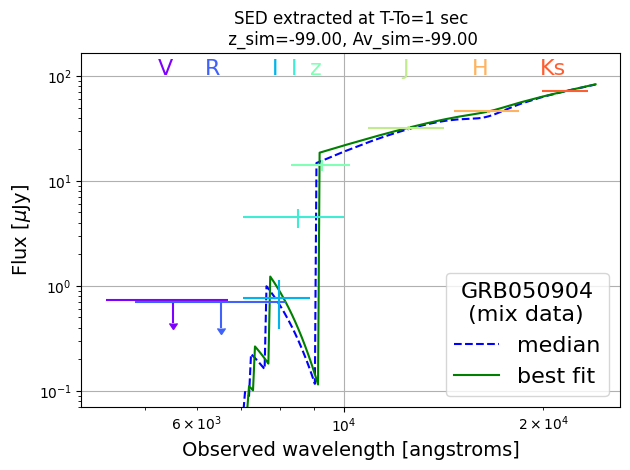


List of GRB not detected: []

None


Fit 1/1 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7967 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.75.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/s


Autocorrelation time: 87.14 steps


Mean acceptance fraction: 0.094

Best fit:
z: 6.571  Av: 0.050  beta: 1.425  Norm: 1.117     chi2: 4.483

Mean Proba: 1.31e-02
Sum Proba: 5.89e+02

68% - 1 sigma:
z: 6.579 +0.970 -5.147
Av: 0.415 +2.419 -0.350
Beta: 1.238 +0.215 -0.869
norm: 2.328 +7.510 -1.168

95% - 2 sigma:
z: 6.579 +1.361 -6.536
Av: 0.415 +6.866 -0.401
Beta: 1.238 +0.495 -1.214
norm: 2.328 +15.163 -1.318

99% - 3 sigma:
z: 6.579 +1.909 -6.578
Av: 0.415 +7.360 -0.414
Beta: 1.238 +1.349 -1.237
norm: 2.328 +17.327 -1.400


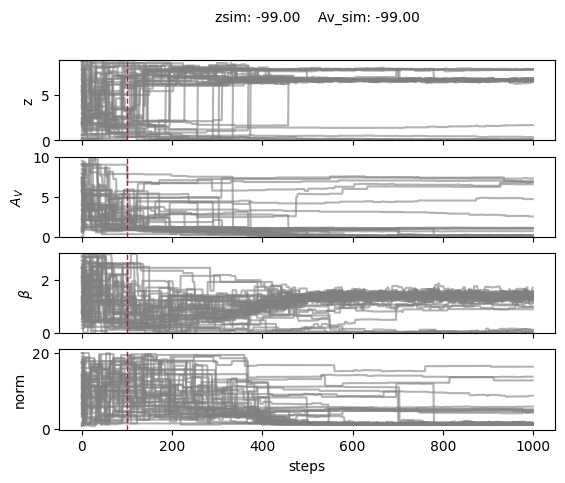

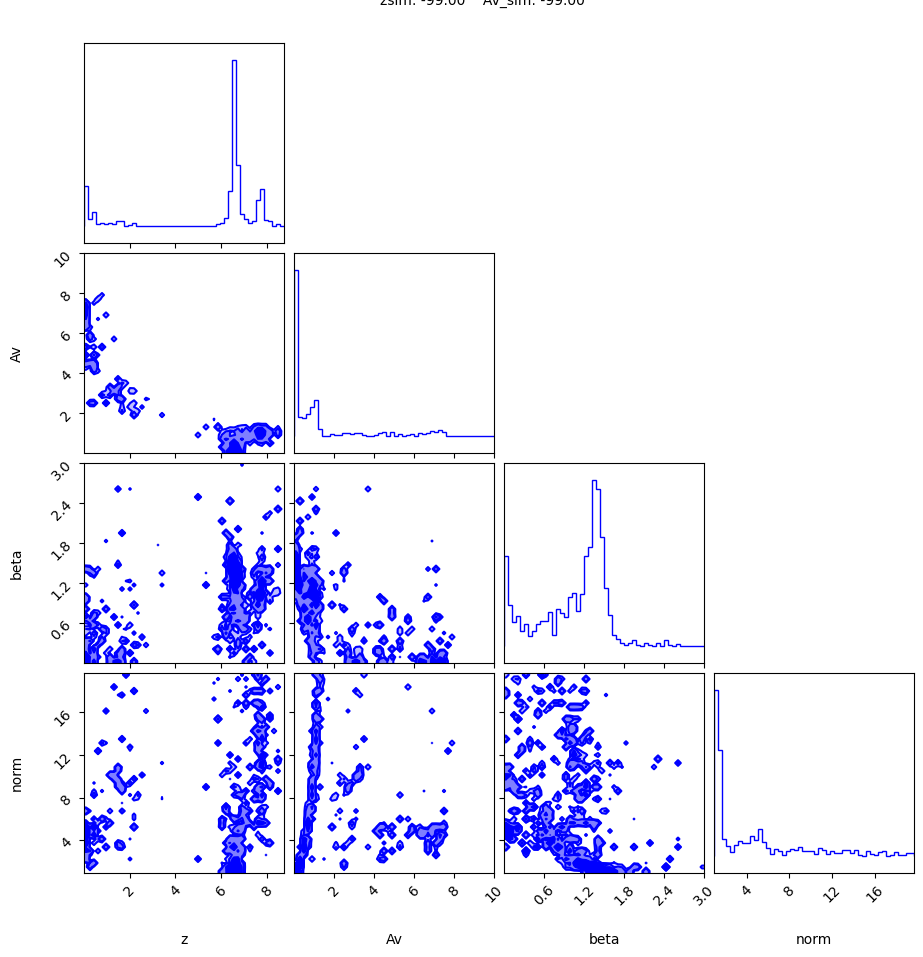


For best SED plot:
- Median values PDF: 6.579 0.415 1.238 2.328
- Best fit: 6.571 0.050 1.425 1.117


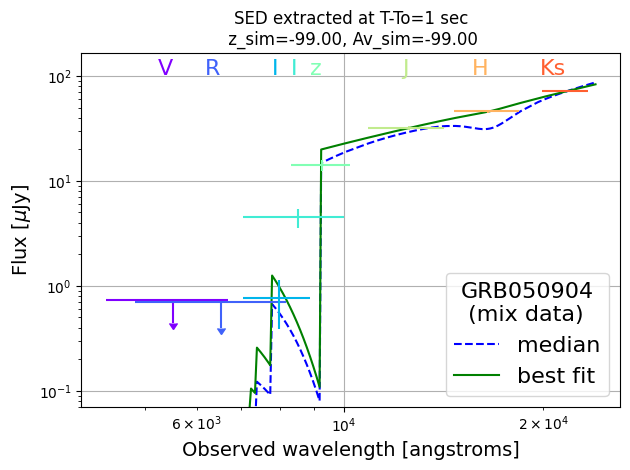


List of GRB not detected: []

None


Fit 1/1 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7967 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.75.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/s


Autocorrelation time: nan steps


Mean acceptance fraction: 0.319

Best fit:
z: 6.587  beta: 1.496  Norm: 0.982     chi2: 5.272

Mean Proba: 2.51e-02
Sum Proba: 1.08e+03

68% - 1 sigma:
z: 6.571 +0.090 -0.104
Beta: 1.500 +0.102 -0.104
norm: 0.984 +0.043 -0.039

95% - 2 sigma:
z: 6.571 +0.206 -5.719
Beta: 1.500 +0.284 -1.224
norm: 0.984 +13.340 -0.079

99% - 3 sigma:
z: 6.571 +2.021 -6.270
Beta: 1.500 +1.080 -1.465
norm: 0.984 +13.466 -0.150


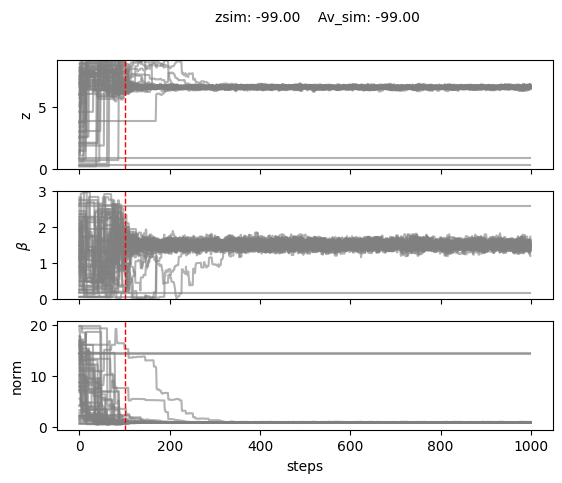

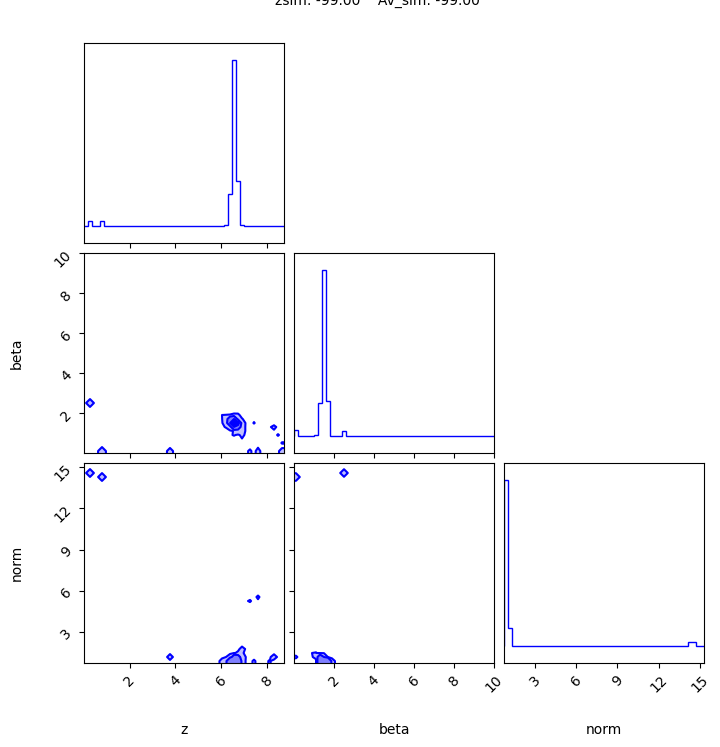


For best SED plot:
- Median values PDF: 6.571 0.000 1.500 0.984
- Best fit: 6.587 0.000 1.496 0.982


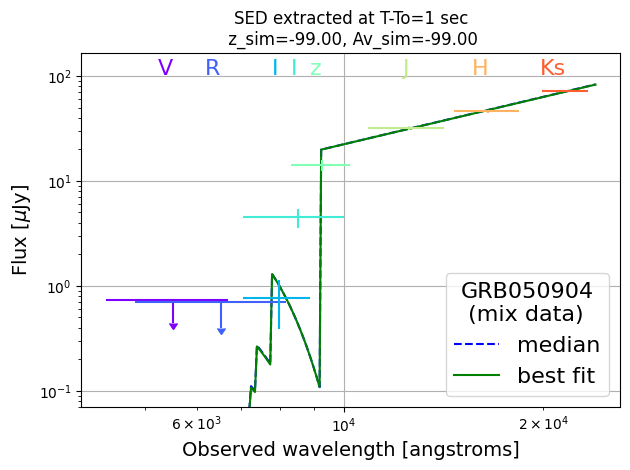


List of GRB not detected: []

None


Fit 1/1 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7967 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.75.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
  0%|                                                  


Autocorrelation time: 87.74 steps


Mean acceptance fraction: 0.053

Best fit:
z: 6.575  Av: 0.002  beta: 1.496  Norm: 0.983     chi2: 5.360

Mean Proba: 6.18e-03
Sum Proba: 2.78e+02

68% - 1 sigma:
z: 6.100 +0.269 -5.421
Av: 0.682 +3.391 -0.351
Beta: 1.121 +0.233 -0.902
norm: 3.757 +2.867 -1.842

95% - 2 sigma:
z: 6.100 +0.687 -5.752
Av: 0.682 +5.487 -0.575
Beta: 1.121 +0.590 -1.105
norm: 3.757 +9.899 -2.526

99% - 3 sigma:
z: 6.100 +2.322 -5.979
Av: 0.682 +9.125 -0.663
Beta: 1.121 +1.815 -1.117
norm: 3.757 +14.235 -2.751


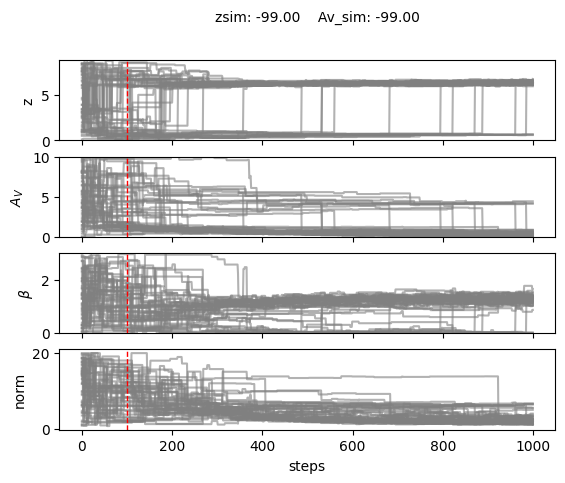

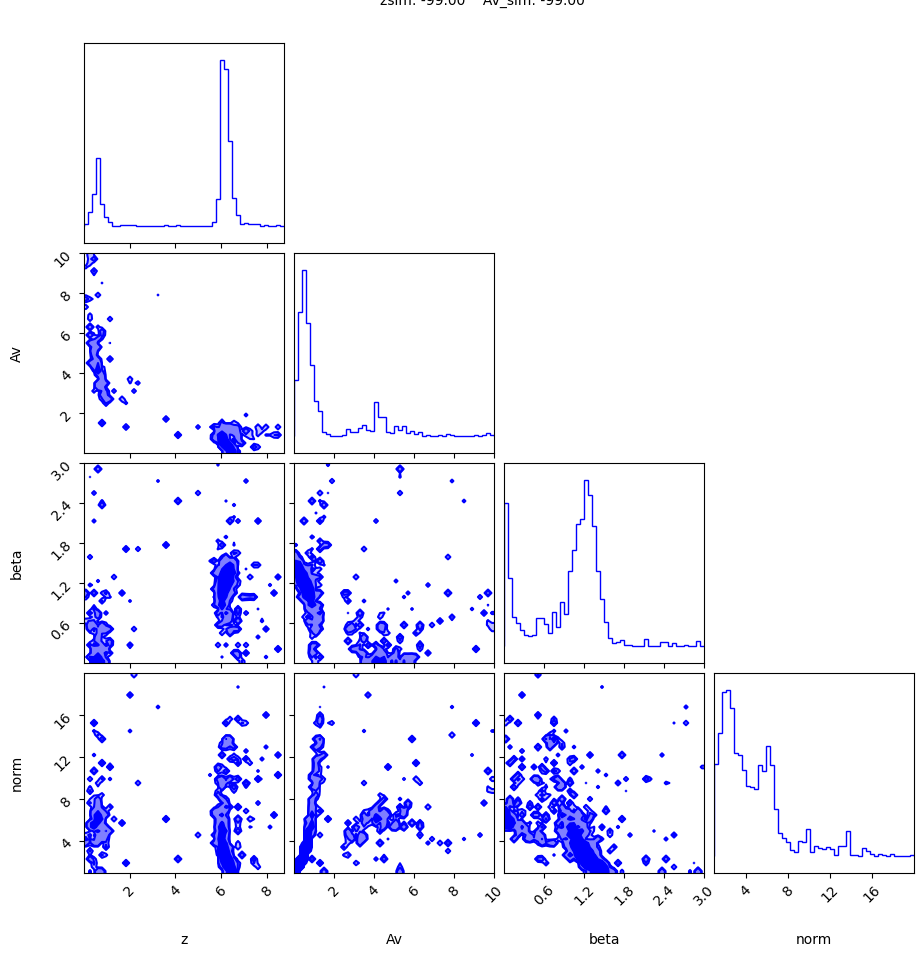


For best SED plot:
- Median values PDF: 6.100 0.682 1.121 3.757
- Best fit: 6.575 0.002 1.496 0.983


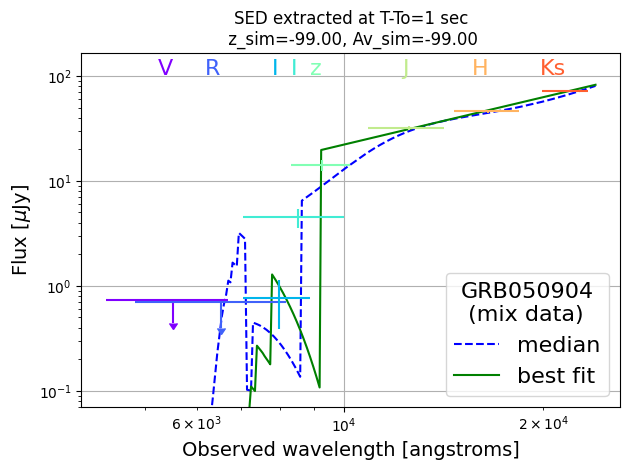


List of GRB not detected: []

None


In [33]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust','sne'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase, values returning the best chi2
# are used as initial values for production run. Set to 0 if you do not want this 
# Nsteps2: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'

ext_laws = ['smc', 'lmc', 'mw', 'nodust','sne']
for law in ext_laws:
    photoz.fit(
        ext_law=law,
        Nthreads=6,
        nwalkers=50,
#        Nsteps1=500,
#        Nsteps2=1000,
        Nsteps1=0,
        Nsteps2=1000,
        nburn=100,
#        nburn=300,
        Host_dust=True,
        Host_gas=False,
        igm_att='Meiksin',
        clean_data=False,
        priors=priors,
        adapt_z=True
        )

# Statistic comparison

In [34]:
from pyGRBz.estimation import stats

In [35]:
out = path+'/results/sed/'+"GRB050904"+"/"

In [42]:
stats(out,ext_laws=ext_laws,lim_bic = 2)

Best fit is with the - nodust - extinction law
GRB not resolved with BIC threshold of  2
